In [2]:
import numpy as np
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

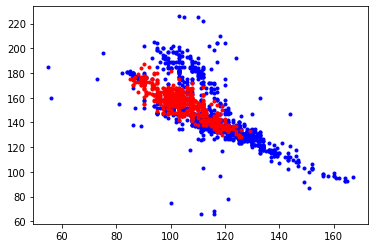

In [4]:
[X_train, y_train, X_test, y_test] = np.load("TP3.npy",allow_pickle=True)
#Pixel peau 
T_train = X_train[np.where(y_train==1),:] 

T_train = np.reshape(T_train,(T_train.shape[1],T_train.shape[2] )) 
#Pixel non peau 
F_train = X_train[np.where(y_train==0),:] 
F_train = np.reshape(F_train,(F_train.shape[1],F_train.shape[2] ))
plt.plot(F_train[:,0], F_train[:,1], '.b') 
plt.show
plt.plot(T_train[:,0], T_train[:,1], '.r') 
plt.show

Combien y a-t-il de pixels de teinte chaire ? de teinte non chaire ? Quelle est la dimension des données ?

In [5]:
print ( "il y'a {} pixels de teinte chaire".format(np.shape(T_train)))
print ( "il y'a {} pixels de teinte chaire".format(np.shape(F_train)))


il y'a (639, 2) pixels de teinte chaire
il y'a (1731, 2) pixels de teinte chaire


In [6]:
# II. Modélisation de la densité de probabilité a priori de la teinte chaire par une loi normale 2D avec des dimensions décorrélées

In [7]:
import math 
def norm1(x, m, s): 
  p =1/(math.sqrt(2*math.pi)*s)*math.exp(-(x-m)*(x-m)/(2*s*s)) 
  return p

In [8]:
#Déterminer 𝑚Cb, 𝑚Cr, 𝜎Cb, 𝜎Cr.

"""Cb == axe 0
Cr == axe 1 """
# Les données stats possedent deux axes 

'Cb == axe 0\nCr == axe 1 '

In [ ]:
# Lors de la classification , on compare notre classe avec d'autres données

In [9]:
mCr = np.mean(T_train[:,1]) #
print("mCr vaut : " , mCr)

mCb = np.mean(T_train[:,0])
print("mCb vaut : " , mCb)

Sigma_Cr = np.std(T_train[:,1])
print("𝜎Cr vaut : " , Sigma_Cr)

Sigma_Cb = np.std(T_train[:,0]) # Ecart type
print("𝜎Cb vaut : " , Sigma_Cb)



mCr vaut :  155.19405320813772
mCb vaut :  104.29577464788733
𝜎Cr vaut :  11.607693835769547
𝜎Cb vaut :  9.067914388009926


In [ ]:
# Utiliser la fonction norm1(𝑥, 𝑚, 𝜎) pour estimer la probabilité de tous les pixels de la base d’apprentissage X_train d’appartenir à la teinte chaire

In [10]:
""" La fonction norm1 est pour une valeur de x , et X_train possède plusieurs valeurs"""

pl_train =  [norm1 ( X[0], mCb , Sigma_Cb) * norm1 ( X[1], mCr , Sigma_Cr) for X in X_train]

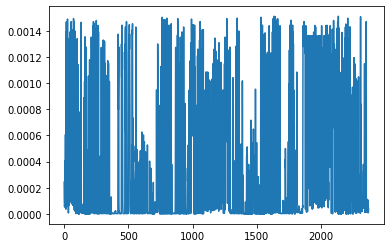

In [11]:
plt.plot(pl_train)

In [12]:
# Quelle est la dimension de 𝑚Cb, 𝑚Cr, 𝜎Cb, 𝜎Cr ? 
# ce sont des scalaires , de dimension 1 

# Pour un pixel 𝒙 de teinte chaire donnée, quelle est la dimension de 𝑝(𝒙/𝑐ℎ𝑎𝑖𝑟) ?



#Quelle est la dimension du vecteur p1_train ?
print( " la dimension du vecteur p1_train est : ", np.shape(pl_train), "SUIIIIIIIIIIIIIII") 

#Quelle hypothèse nous permet d’estimer la valeur de la loi normale à partir de l’équation précédente ?
# d'apres abdel , aucune idée 

 la dimension du vecteur p1_train est :  (2370,) SUIIIIIIIIIIIIIII


In [ ]:
# b. Classification

Afin de classer les pixels de test X_test comme teinte chaire ou non, 
on estime la valeur de 𝑝(𝒙/𝑐ℎ𝑎𝑖𝑟) en ces points que l’on stocke dans P1_test. 
Pour réaliser la classification, on seuille P1_test en utilisant comme seuil initial la valeur moyenne de P1_train.

In [13]:


seuil_train = np.mean(pl_train)

def Classification(seuil) : 
  TP = 0 
  TN = 0 
  FP = 0 
  FN = 0
    
  pl_test = []
  for i , X in enumerate(X_test) : 

    pl_test.append( norm1 ( X[0], mCb , Sigma_Cb) * norm1 ( X[1], mCr , Sigma_Cr) ) 

    if pl_test[i] > seuil and y_test[i] == 1 : 
      TP += 1 
    if pl_test[i] > seuil and y_test[i] == 0 : 
      FP += 1
    if pl_test[i] < seuil and y_test[i] == 0 : 
      TN += 1
    if pl_test[i] < seuil and y_test[i] == 1 : 
      FN += 1
    
  return TP,TN,FP,FN
    
Classification(seuil_train)
print( "TP = " , Classification(seuil_train)[0])
print( "TN = " , Classification(seuil_train)[1])
print( "FP = " , Classification(seuil_train)[2])
print( "FN = " , Classification(seuil_train)[3])







TP =  102
TN =  120
FP =  60
FN =  2


A partir de la base d'entrainement , on en tire des données que l'on veut utiliser (ici le seuil avec la moyenne de la base de training). On applique ces données a la base de test et il nous reste toujours une infirmation sur cette base de test (vérité de terrain).

y_test ==  vérité ( plot y pour comprendre)

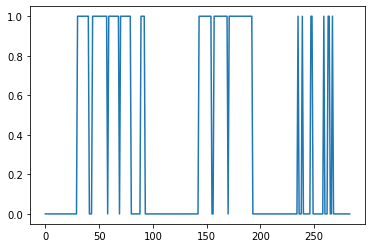

In [14]:
plt.plot(y_test)

In [21]:
"""for i in y_test : 
  if i == 1 : 
    print (i , "Chaire",'\n')
  else : 
    print(i , "Non chaire",'\n')"""

'for i in y_test : \n  if i == 1 : \n    print (i , "Chaire",\'\n\')\n  else : \n    print(i , "Non chaire",\'\n\')'

In [ ]:
# Comment estimer la sensibilité et la spécificité ? 

In [18]:
TP = Classification(seuil_train)[0] ; print( "TP = " , TP)
TN = Classification(seuil_train)[1] ;  print( "TN = " , TN )
FP  = Classification(seuil_train)[2] ; print( "FP = " , FP)
FN = Classification(seuil_train)[3] ; print( "FN = " ,FN)


sensibilite = TP/(TP+FN)
print("Sensibilité = " , sensibilite)
spec = TN/(FP+TN)
print("Specificité = " , spec)

TP =  102
TN =  120
FP =  60
FN =  2
Sensibilité =  0.9807692307692307
Specificité =  0.6666666666666666


In [19]:
taux = (TP+TN)/len(X_test)
print("Le taux de positivité :" , taux)

Le taux de positivité : 0.7816901408450704


### c. Courbe ROC

In [20]:
NB = 20 
step = (np.max(pl_train) - np.min(pl_train) ) / NB 
SEUILS = np.arange (np.min(pl_train), np.max(pl_train), step)

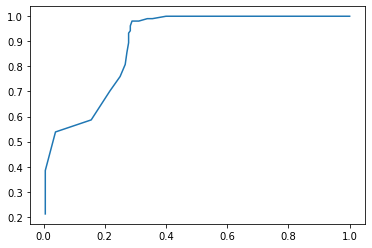

In [22]:
Sens = [] 
Spec = [] # 1 - specificite

for seuils in SEUILS : 

  TP = Classification(seuils)[0] 
  TN = Classification(seuils)[1] 
  FP  = Classification(seuils)[2]
  FN = Classification(seuils)[3]
  
  Sens.append(TP/(TP+FN))
  Spec.append(1 - TN/(FP+TN))



plt.plot(Spec,Sens)




